# PaCMAP clustering
Notebook to plot clusters using PaCMAP

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from fungiclef.config import get_device

device = get_device()
device

'cuda'

In [3]:
import os
from pathlib import Path

# get list of stored filed in cloud bucket
root = Path(os.path.expanduser("~"))
! date

Sat May 10 15:20:22 EDT 2025


In [ ]:
import pandas as pd

project_path = f"{root}/p-dsgt_clef2025-0/shared/fungiclef"
test_embed_path = f"{project_path}/temp/embeddings/test_embed.parquet"
test_parquet_path = f"{project_path}/data/dataset/processed/test_serialized.parquet"
test_emb_df = pd.read_parquet(test_embed_path)
test_df = pd.read_parquet(test_parquet_path)
display(test_emb_df.head())
display(test_df.head())

,filename,embeddings
0,0-4100099350.JPG,"[2.5461506843566895, 0.5242702960968018, 0.185..."
1,1-4100096393.JPG,"[-1.2131319046020508, 1.0039087533950806, 0.71..."
2,0-4100103428.JPG,"[-0.34422793984413147, 0.8988369107246399, -0...."
3,1-4100103428.JPG,"[0.13931599259376526, 0.4914350211620331, -0.8..."
4,2-4100103428.JPG,"[0.07387250661849976, 0.2519272267818451, 0.19..."


,eventDate,year,month,day,habitat,countryCode,hasCoordinate,substrate,latitude,longitude,coorUncert,observationID,region,district,filename,metaSubstrate,elevation,landcover,biogeographicalRegion,data
0,2023-01-08,2023.0,1.0,8.0,Deciduous woodland,DK,True,dead wood (including bark),55.993269,12.290225,50.0,4100099350,Hovedstaden,Hillerød,0-4100099350.JPG,wood,43.0,12.0,continental,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
1,2023-01-10,2023.0,1.0,10.0,Unmanaged deciduous woodland,DK,True,dead wood (including bark),55.973423,10.550840,5.0,4100096393,Midtjylland,Samsø,1-4100096393.JPG,wood,64.0,12.0,continental,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
2,2023-01-09,2023.0,1.0,9.0,lawn,ES,True,soil,28.501376,-17.874959,5.0,4100103428,Islas Canarias,Santa Cruz de Tenerife,0-4100103428.JPG,jord,0.0,0.0,None,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
3,2023-01-09,2023.0,1.0,9.0,lawn,ES,True,soil,28.501376,-17.874959,5.0,4100103428,Islas Canarias,Santa Cruz de Tenerife,1-4100103428.JPG,jord,0.0,0.0,None,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
4,2023-01-09,2023.0,1.0,9.0,lawn,ES,True,soil,28.501376,-17.874959,5.0,4100103428,Islas Canarias,Santa Cruz de Tenerife,2-4100103428.JPG,jord,0.0,0.0,None,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...


In [32]:
len(test_emb_df), len(test_df)

(1911, 1911)

In [33]:
test_df.columns

Index(['eventDate', 'year', 'month', 'day', 'habitat', 'countryCode',
       'hasCoordinate', 'substrate', 'latitude', 'longitude', 'coorUncert',
       'observationID', 'region', 'district', 'filename', 'metaSubstrate',
       'elevation', 'landcover', 'biogeographicalRegion', 'data'],
      dtype='object')

In [28]:
import pacmap
import numpy as np
from sklearn.preprocessing import StandardScaler


def pacmap_embeddings(df: pd.DataFrame, col_name: str = "embeddings") -> np.ndarray:
    emb_df = np.stack(df[col_name].values)
    scaled_emb = StandardScaler().fit_transform(emb_df)

    # PaCMAP reduction
    reducer = pacmap.PaCMAP(n_components=2, random_state=42)
    embedding = reducer.fit_transform(
        scaled_emb
    )  # numpy array with shape (n_samples, 2)
    return embedding

In [29]:
# get cluster embeddings
embeddings = pacmap_embeddings(test_emb_df)

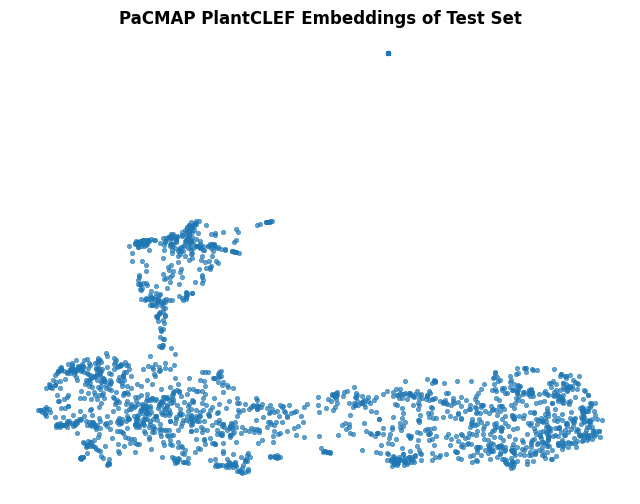

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(embeddings[:, 0], embeddings[:, 1], s=10, alpha=0.7, linewidths=0.5)
plt.title("PaCMAP PlantCLEF Embeddings of Test Set", weight="bold")
plt.axis("off")
plt.show()

In [35]:
train_embed_path = f"{project_path}/temp/embeddings/train_embed.parquet"
train_parquet = f"{project_path}/data/dataset/processed/train_serialized.parquet"
train_embed_df = pd.read_parquet(train_embed_path)
train_df = pd.read_parquet(train_parquet)
display(train_embed_df.head())
display(train_df.head())

,filename,embeddings
0,0-3052832307.JPG,"[-1.2559032440185547, 1.8512070178985596, -0.2..."
1,0-3061954303.JPG,"[-1.6616631746292114, -0.033579133450984955, -..."
2,1-3061954303.JPG,"[0.09439272433519363, 0.09596756845712662, -0...."
3,2-3061954303.JPG,"[1.1593152284622192, 0.2725003957748413, -0.39..."
4,3-3061954303.JPG,"[0.10036885738372803, 1.0950580835342407, 0.41..."


,eventDate,year,month,day,habitat,countryCode,scientificName,kingdom,phylum,class,...,region,district,filename,category_id,metaSubstrate,poisonous,elevation,landcover,biogeographicalRegion,data
0,2021-01-24,2021,1.0,24.0,Mixed woodland (with coniferous and deciduous ...,DK,Xylohypha ferruginosa (Corda) S.Hughes,Fungi,Ascomycota,Eurotiomycetes,...,Sjælland,Næstved,0-3052832307.JPG,2421,wood,0,0.0,16.0,continental,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
1,2021-02-27,2021,2.0,27.0,garden,DK,"Comatricha alta Preuss, 1851",Protozoa,Mycetozoa,Myxomycetes,...,Hovedstaden,Gribskov,0-3061954303.JPG,386,wood,0,0.0,17.0,continental,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
2,2021-02-27,2021,2.0,27.0,garden,DK,"Comatricha alta Preuss, 1851",Protozoa,Mycetozoa,Myxomycetes,...,Hovedstaden,Gribskov,1-3061954303.JPG,386,wood,0,0.0,17.0,continental,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
3,2021-02-27,2021,2.0,27.0,garden,DK,"Comatricha alta Preuss, 1851",Protozoa,Mycetozoa,Myxomycetes,...,Hovedstaden,Gribskov,2-3061954303.JPG,386,wood,0,0.0,17.0,continental,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
4,2021-02-27,2021,2.0,27.0,garden,DK,"Comatricha alta Preuss, 1851",Protozoa,Mycetozoa,Myxomycetes,...,Hovedstaden,Gribskov,3-3061954303.JPG,386,wood,0,0.0,17.0,continental,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...


In [36]:
# get cluster embeddings
train_embeddings = pacmap_embeddings(train_embed_df)

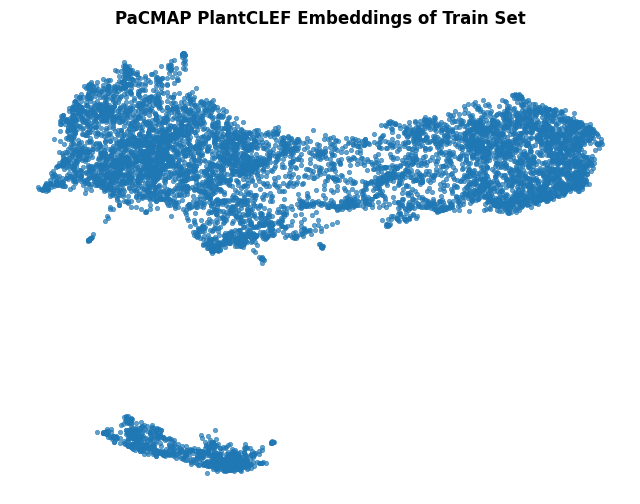

In [ ]:
plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(
    train_embeddings[:, 0], train_embeddings[:, 1], s=10, alpha=0.7, linewidths=0.5
)
plt.title("PaCMAP PlantCLEF Embeddings of Train Set", weight="bold")
plt.axis("off")
plt.show()

In [39]:
train_df.columns

Index(['eventDate', 'year', 'month', 'day', 'habitat', 'countryCode',
       'scientificName', 'kingdom', 'phylum', 'class', 'order', 'family',
       'genus', 'specificEpithet', 'hasCoordinate', 'species',
       'iucnRedListCategory', 'substrate', 'latitude', 'longitude',
       'coorUncert', 'observationID', 'region', 'district', 'filename',
       'category_id', 'metaSubstrate', 'poisonous', 'elevation', 'landcover',
       'biogeographicalRegion', 'data'],
      dtype='object')

In [41]:
kingdoms = train_df.kingdom.unique().tolist()
kingdoms

['Fungi', 'Protozoa', 'Chromista']

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc("font", size=14)  # Set default font size


def plot_pacmap_clusters(
    pandas_df: pd.DataFrame,
    cls_token: pd.DataFrame,
    col_name: str = "kingdom",
    top_n: int = 20,
    figsize: tuple = (10, 7),
    dpi: int = 120,
):
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    colors = plt.cm.tab10.colors  # Distinct color palette
    pandas_df = pandas_df.copy()

    # plot top-N frequency
    top_clusters = pandas_df[col_name].value_counts().nlargest(top_n).index
    num_clusters = min(len(top_clusters), top_n)
    plot_groups = [
        (cluster, pandas_df[col_name] == cluster, cluster) for cluster in top_clusters
    ]
    fig.suptitle(
        f"PaCMAP {col_name} projection, top {num_clusters} clusters",
        fontsize=22,
        weight="bold",
    )

    # plot loop
    for i, (_, idx, label) in enumerate(plot_groups):
        ax.scatter(
            cls_token[idx, 0],
            cls_token[idx, 1],
            label=label,
            s=20,
            alpha=0.5,
            linewidth=0.5,
            color=colors[i % len(colors)],
        )
        ax.set_xticklabels([])
        ax.set_yticklabels([])

    ax.grid(color="blue", linestyle="--", linewidth=1, alpha=0.2)

    # remove axis spines
    for spine in ax.spines.values():
        spine.set_visible(False)

    fig.tight_layout(pad=0.8)

    # add legend
    lgnd = ax.legend(
        ncol=3,
        loc="best",
        fontsize=12,
        shadow=True,
    )
    for handle in lgnd.legend_handles:
        handle.set_sizes([60.0])

    plt.show()

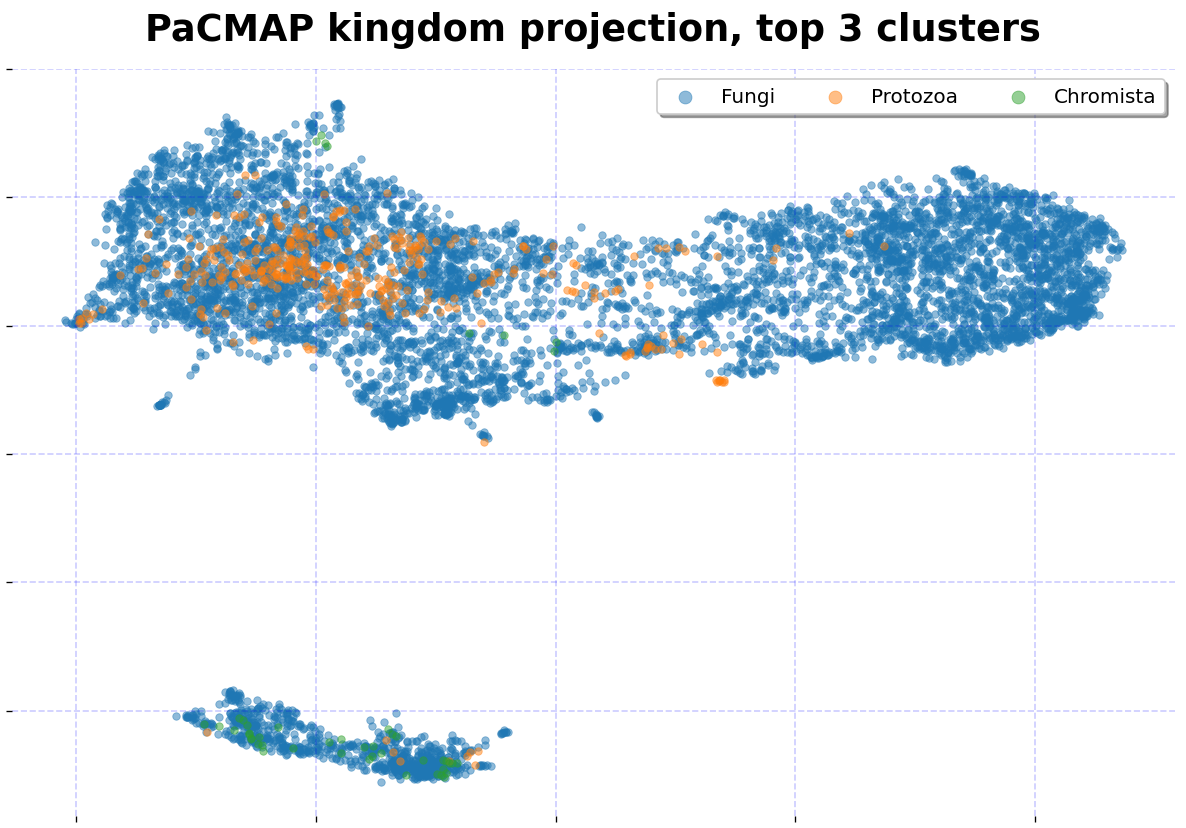

In [80]:
# plot PaCMAP clusters
plot_pacmap_clusters(
    train_df,
    train_embeddings,
    col_name="kingdom",
    figsize=(10, 7),
    dpi=120,
)

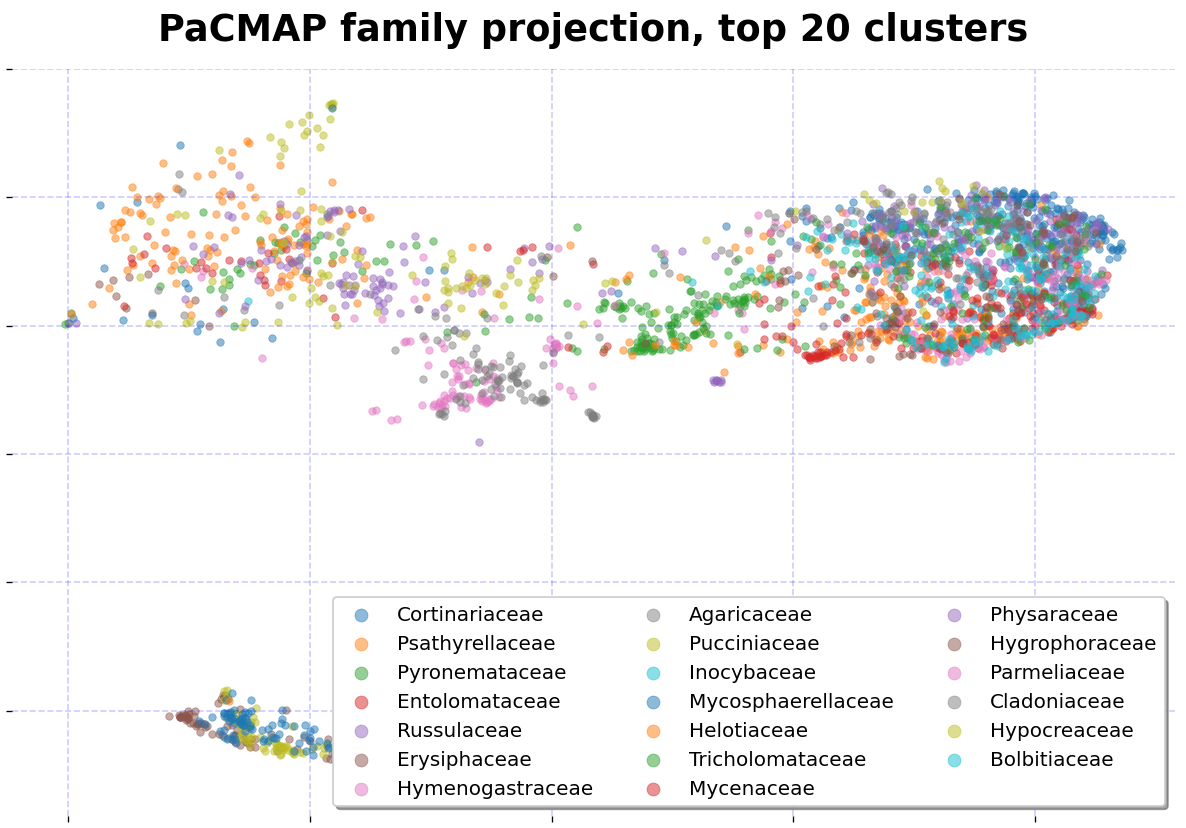

In [82]:
# plot PaCMAP clusters
plot_pacmap_clusters(
    train_df,
    train_embeddings,
    col_name="family",
    figsize=(10, 7),
    dpi=120,
)

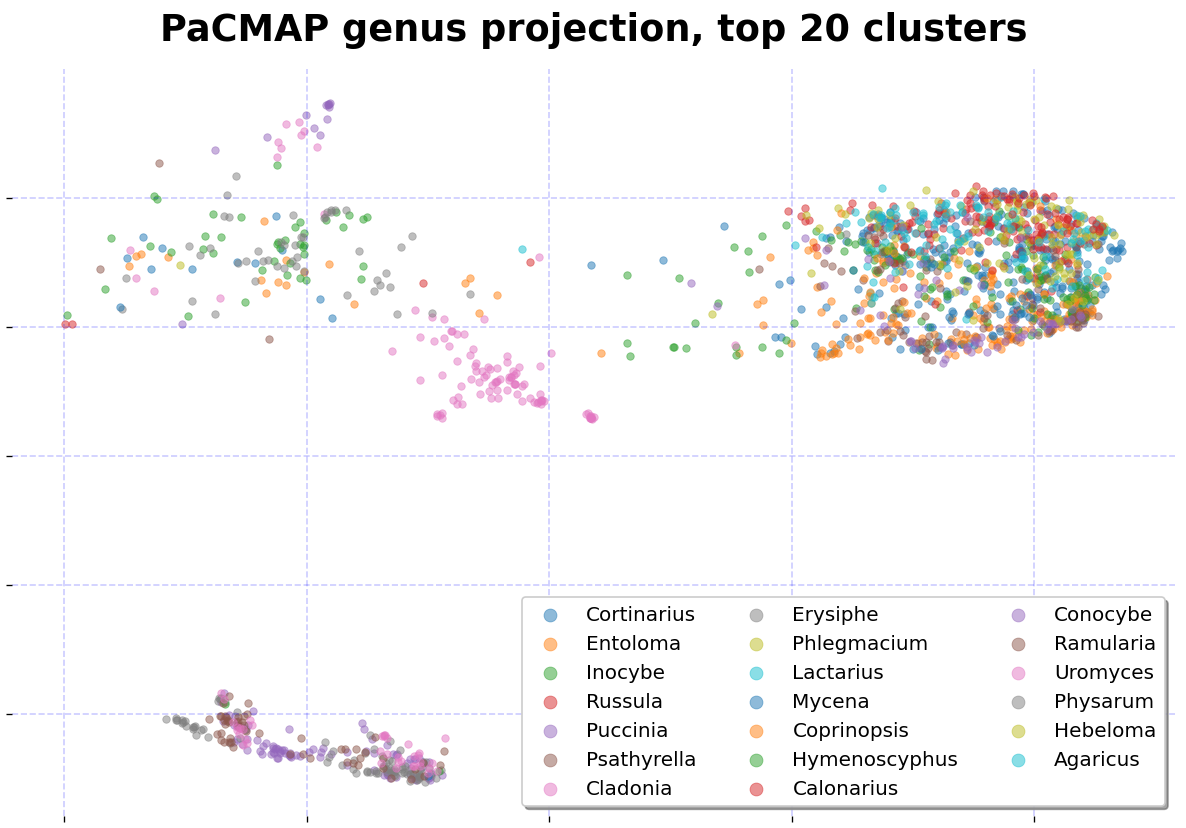

In [83]:
# plot PaCMAP clusters
plot_pacmap_clusters(
    train_df,
    train_embeddings,
    col_name="genus",
    figsize=(10, 7),
    dpi=120,
)